
# **Analytics 2 : <font color=#DF4807> Neural Networking Foundations**


## **Objective**: OCR with neural network

In [64]:
#load libs
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [65]:
#Load MNist OCR dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

assert x_train.shape == (60000, 28, 28) #each datapoint is a 28*28 image, these are our x values
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


In [66]:
x_train[0].shape #images are of dimension 28 x 28


(28, 28)

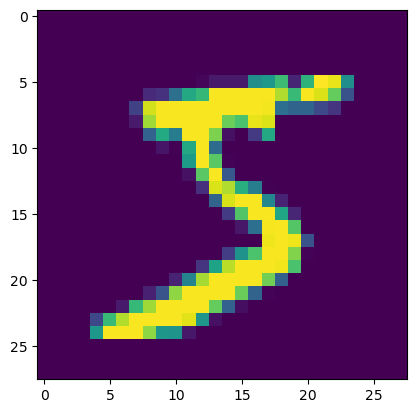

In [67]:
img = np.reshape(x_train[0], (28,28)) # view sample image
plt.imshow(img)

In [68]:
y_train[0] #view label of sample image.

5

# **Tasks:**

1. Generate a neural network that can successfully predict the characters.
2. Model accuracy on test data should be minimum 90%.
3. Plot training vs test loss.
3. Explain reason for layers and activation functions in annotations....in detail.
4. How does the dropout layer change the accuracy of your model? Explain.
4. Use Grid Search for hyperparameter optimization if possible.



In [69]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam


In [70]:
learn_rate = 0.01
#your code here
model = Sequential()

# Adding the input layers that is the size of the image (28,28)
model.add(Input(shape=(28,28))) 

# Adding the Flatten Layers to make 2D array ie (28,28) into 1D array ie (28* 28) = 784 neurons. 
model.add(Flatten())  

# Adding the Dense (hidden) Layer (lm layer) with 128 neurons with the activation function relu since it avoids the Vanishing Gradient problem
model.add(Dense(60, activation='relu'))  

# Dropout layer with a dropout rate of 0.2 (20%)
model.add(Dropout(0.2))  

# Adding the Dense (hidden) Layer (lm layer) with 60 neurons with the activation function relu since it avoids the Vanishing Gradient problem
model.add(Dense(60, activation='relu'))  

# # Dropout layer with a dropout rate of 0.2 (20%)
# model.add(Dropout(0.2))


# Output layer with 10 neurons for classification using softmax activation. Softmax is used since it's a multi-classification 
model.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=learn_rate)

# Adding Optimizer Algorithm as Adam. Since Adam dynamically adjusts the learning rate for each parameter during  
# Using  sparse_categorical_crossentropy loss function is gernerally used for the multi-classification 
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_78 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_234 (Dense)            (None, 60)                47100     
_________________________________________________________________
dropout_154 (Dropout)        (None, 60)                0         
_________________________________________________________________
dense_235 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_236 (Dense)            (None, 10)                610       
Total params: 51,370
Trainable params: 51,370
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [72]:
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8111 - accuracy: 0.6701
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7610 - accuracy: 0.7949
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6859 - accuracy: 0.8141
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6353 - accuracy: 0.8298
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5811 - accuracy: 0.8446
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5196 - accuracy: 0.8633
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4697 - accuracy: 0.8732
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4454 - accuracy: 0.8802
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4154 - accuracy: 0.8882
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.388

In [73]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2511 - accuracy: 0.9395


[0.2511110007762909, 0.9394999742507935]

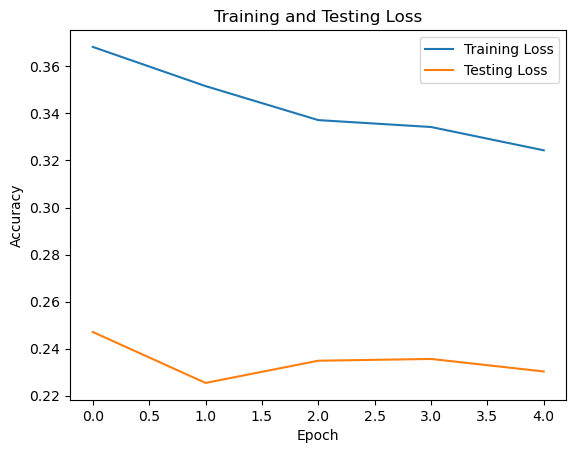

In [74]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test),verbose=0)

# Plot training history (accuracy)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Loss')
plt.legend()
plt.ylim(0, 50) 
plt.show()

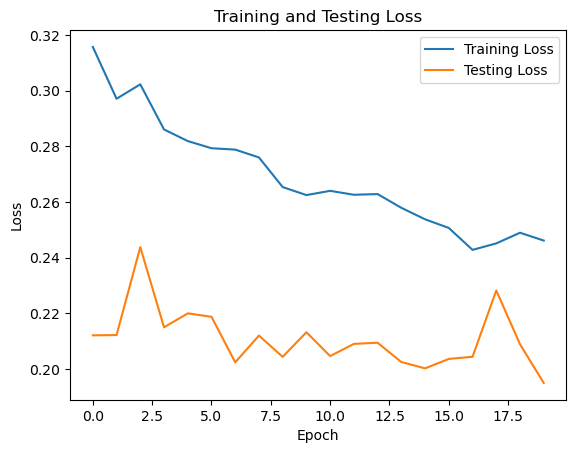

In [75]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test),verbose=0)

# Plot training history (accuracy)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV


In [77]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

# Define a function to create the Keras model
def create_model(learn_rate):
    model = Sequential()
    # Adding the input layers that is the size of the image (28,28)
    model.add(Input(shape=(28,28))) 
    # Adding the Flatten Layers to make 2D array ie (28,28) into 1D array ie (28* 28) = 784 neurons. 
    model.add(Flatten())  

    # Adding the Dense (hidden) Layer (lm layer) with 60 neurons with the activation function relu since it avoids the Vanishing Gradient problem
    model.add(Dense(60, activation='relu'))  
    
    # Dropout layer with a dropout rate of 0.2 (20%)
    model.add(Dropout(0.2))  

    # Adding the Dense (hidden) Layer (lm layer) with 60 neurons with the activation function relu since it avoids the Vanishing Gradient problem
    model.add(Dense(60, activation='relu'))  
    
    # Dropout layer with a dropout rate of 0.2 (20%)
    model.add(Dropout(0.2))


    # Output layer with 10 neurons for classification using softmax activation. Softmax is used since it's a multi-classification 
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    optimizer = Adam(learning_rate=learn_rate)

    # Adding Optimizer Algorithm as Adam. Since Adam dynamically adjusts the learning rate for each parameter during  
    # Using  sparse_categorical_crossentropy loss function is gernerally used for the multi-classification 
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [16, 32, 50]  # Number of samples used in forward pass
epochs = [2, 5, 10]
learn_rate = [0.1, 0.2,0.05]
param_grid = dict(batch_size=batch_size, learn_rate=learn_rate, epochs=epochs)

# Create and fit the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(x_train, y_train)


In [78]:
best_params = grid_result.best_params_
best_score = grid_result.best_score_
best_model = grid_result.best_estimator_
print("Best Parameters:", best_params)

print("Best Score:", best_score)
print("Best Model:", best_model)

Best Parameters: {'batch_size': 16, 'epochs': 10, 'learn_rate': 0.05}
Best Score: 0.11236666639645894
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000028388B86F40>


# **Bonus Challenge:**

I have provided you code that grants access to your webcam via colab. For bonus points, create pipeline that can predict numbers that are seen in your laptops camera.

In [80]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

ModuleNotFoundError: No module named 'google.colab'

In [81]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  |

name 'take_photo' is not defined
